https://www.kaggle.com/c/titanic

Project Titanic - Machine Learning from Disaster

# (1) Introduction

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# (2) Loading the data

In [1]:
import os
os.chdir('/content/drive/MyDrive/Projects/titanic')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from wordcloud import WordCloud
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Tập train có thông tin 'Survived'

Tập test thì không có 'Survived'

Notes:
*   sibsp:	# of siblings / spouses aboard the Titanic
*   parch:	# of parents / children aboard the Titanic
*   ticket:	Ticket number
*   cabin:	Cabin number

In [6]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerID

The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [7]:
train_df.set_index('PassengerId', inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df = pd.read_csv('test.csv', index_col="PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# (3) Feature Classification: Categorical vs Numerical
*   This helps us select the appropriate plots for visualization.

Which features are categorical?

*   Categorical Features: nominal, ordinal, ratio, interval
*   To classify the samples into sets of simila samples

Which features are numerical?

*   Numerical Features: discrete, continuous or timeseries
*   These values change from sample to sample

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


*   Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

*   Numerical: (continuous) Age, Fare, (discrete)
*   Mix types of data: Ticket, Cabin
*   Contain Error / Typo: Name
*   Blank or Null: Cabin > Age > Embarked
*   Various Data Type: String, Int, Float

According to the data dictionary, we know that if a passenger is marked as 1, he/ she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [11]:
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Survived'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [13]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## Distribution of Numerical feature values across the samples

In [15]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features

In [16]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# (4) Exploratory Data Analysis (EDA)

## (4.1) Correlating categorical features

* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

Target variable: 'Survived'

In [17]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [18]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not serve which is why I will not consider techniques like sampling to tackle the imbalance

**Sex**


In [19]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

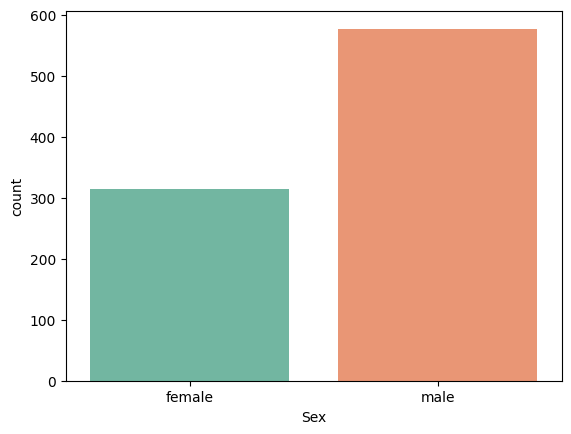

In [20]:
sns.countplot(data=train_df, x="Sex", palette="Set2")

<Axes: xlabel='Sex', ylabel='count'>

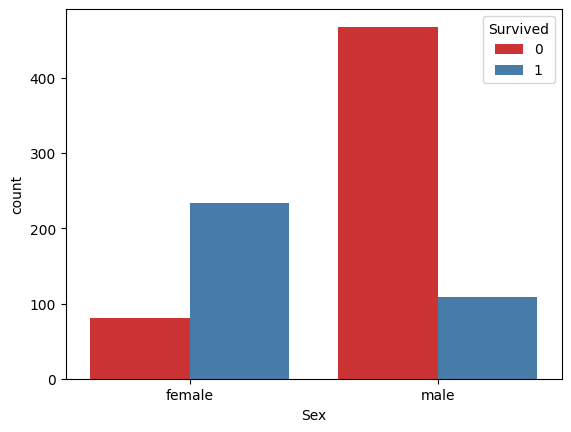

In [21]:
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Set1")

**Remaining Categorical Feature Columns**

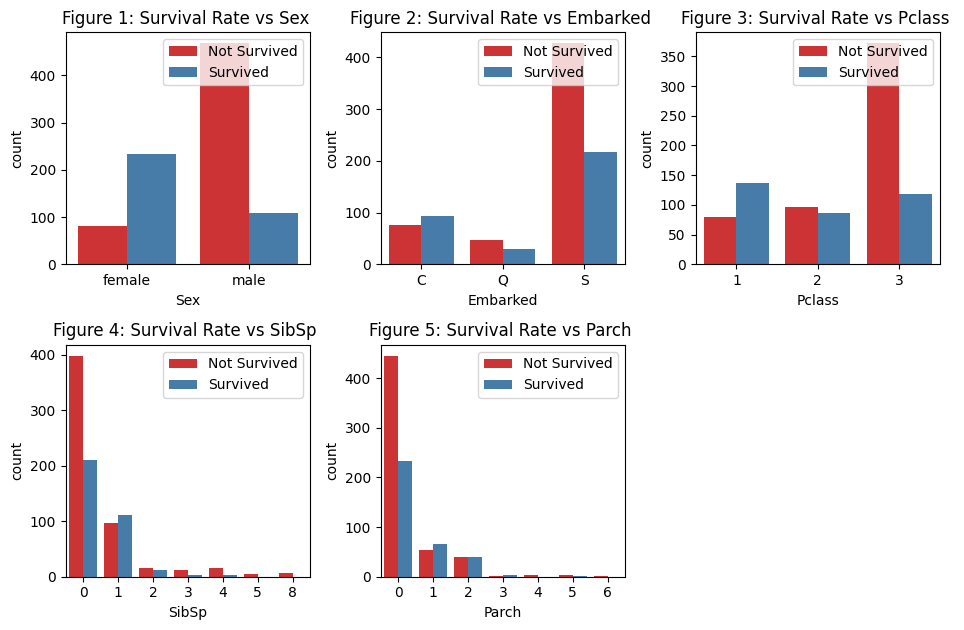

In [22]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c #index to loop through list 'cols'
    if i < len(cols):
      ax_i = ax[r][c]
      sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Set1", ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]} ")
      ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()

-> Observation: Survival Rate
*   Fig 1: Female survival rate > male
*   Fig 2: Most people embarked on Southampton, and also had the highest people not survived
*   Fig 3: 1st class higher survival rate
*   Fig 4: People going with 0 SibSp are mostly not survived the number of passenger with 1-2 family members has a better chance of survival
*   Fig 5: People going with 0 Parch are mostly not survived


## (4.2) EDA for Numerical Features

* Numberical features: (continuous) Age, Fare

**Age**

<Axes: xlabel='Age', ylabel='Count'>

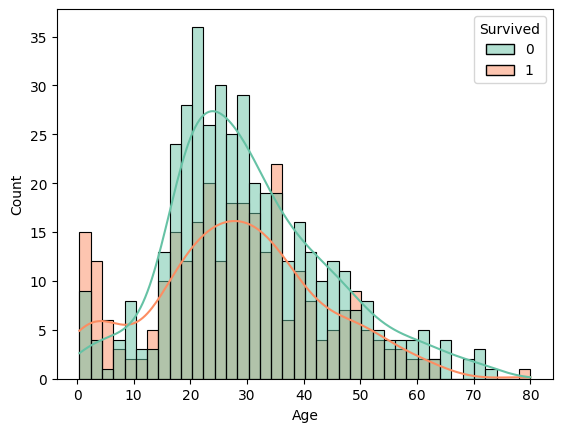

In [23]:
sns.histplot(data=train_df, x="Age", bins=40, kde=True, palette="Set2", hue='Survived')

*   Majority passengers were from 18-40 ages
*   Children had more chance to survive than other ages


**Fare**

In [24]:
train_df["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

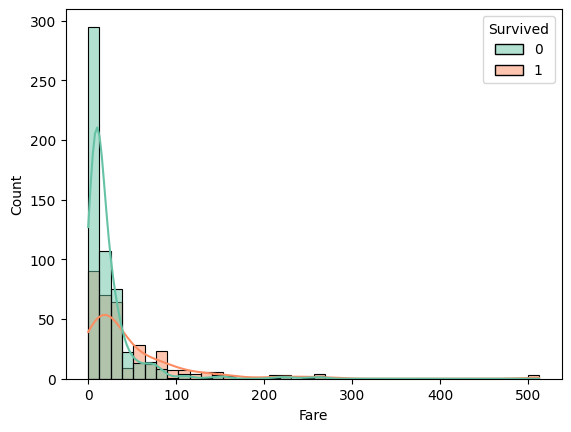

In [25]:
sns.histplot(data=train_df, x="Fare", bins=40, kde=True, palette="Set2", hue='Survived')

In [26]:
# To name for 0-25 quartile, 25-50, 50-75, 75-100

pd.qcut(train_df['Fare'], 4).value_counts()

,count
Fare,
"(7.91, 14.454]",224
"(-0.001, 7.91]",223
"(14.454, 31.0]",222
"(31.0, 512.329]",222


In [27]:
pd.qcut(train_df['Fare'], 4)

,Fare
PassengerId,
1,"(-0.001, 7.91]"
2,"(31.0, 512.329]"
3,"(7.91, 14.454]"
4,"(31.0, 512.329]"
5,"(7.91, 14.454]"
...,...
887,"(7.91, 14.454]"
888,"(14.454, 31.0]"
889,"(14.454, 31.0]"


In [28]:
train_df['Fare']

,Fare
PassengerId,
1,7.2500
2,71.2833
3,7.9250
4,53.1000
5,8.0500
...,...
887,13.0000
888,30.0000
889,23.4500


<Axes: xlabel='Fare', ylabel='count'>

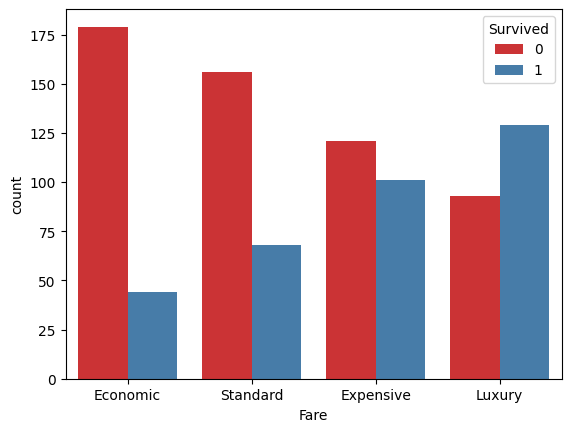

In [29]:
# To name for 0-25 quartile, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data=pd.qcut(train_df['Fare'], 4, labels = fare_categories)

sns.countplot(data=train_df, x=quartile_data, hue="Survived", palette="Set1")

Distribution of fare
*   Fare does not follow a normal distribution and has a huge spike at the price range (0 - $100)

*   The distribution is skewed to the left with 75% of the fare paid under 31 and a max paid fare of 512.

Quartile plot
*   Passenger with Luxury & Expensive Fare will have more chance to survive.


# (5) Feature engineering & Data wrangling

##Name
*   Regular expression


In [30]:
train_df['Name']

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
...,...
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""


In [31]:
train_df['Name'].head()

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"


In [32]:
train_df['Name'].tail()

,Name
PassengerId,
887,"Montvila, Rev. Juozas"
888,"Graham, Miss. Margaret Edith"
889,"Johnston, Miss. Catherine Helen ""Carrie"""
890,"Behr, Mr. Karl Howell"
891,"Dooley, Mr. Patrick"


https://regex101.com/

In [33]:
# import re

def extract_title(name):
  p = re.compile(r",(.+)\.")
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,124
Master,40
Dr,7
Rev,6
Major,2
Mlle,2
Col,2


In [34]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4,NaN,C,Mrs. Martin (Elizabeth L


In [35]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

,Name
PassengerId,
514,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)"


In [36]:
def extract_title(name):
  p = re.compile(r", (\w+)\.")
  if p.search(name) is None:
    print(name)
  # return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)


,count
Title,


In [37]:
def extract_title(name):
  p = re.compile(r", ([\w\s]+)\.")
  # if p.search(name) is None:
  #   print(name)
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [38]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


<Axes: xlabel='Title', ylabel='count'>

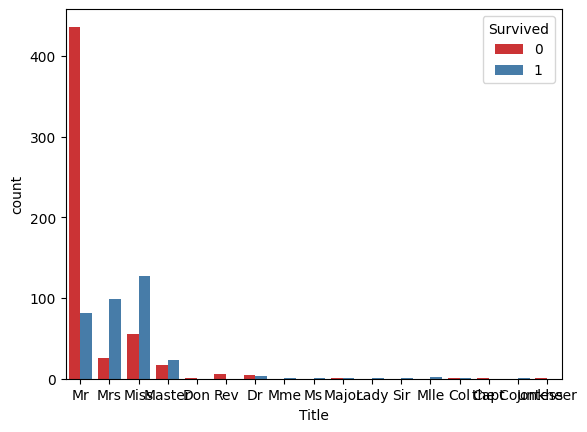

In [39]:
sns.countplot(data=train_df, x="Title", hue="Survived", palette="Set1")

In [40]:
train_df['Title'].apply(lambda title: title if title in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Others')

,Title
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
887,Others
888,Miss
889,Miss


In [41]:
def group_title(title):
  if title in ['Mr', 'Miss', 'Mrs', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
train_df['Title'].value_counts()

test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))
# test_df['Title'].value_counts()

<Axes: xlabel='Title', ylabel='count'>

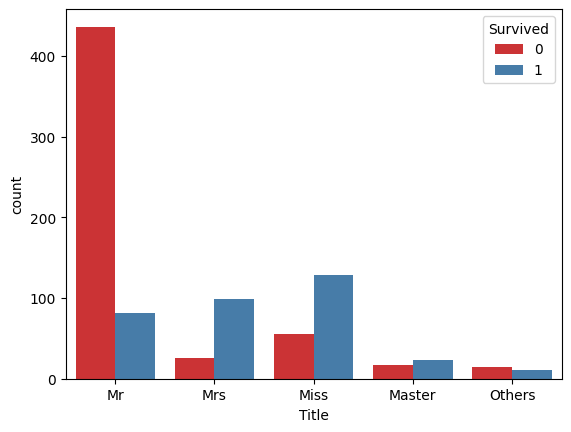

In [42]:
sns.countplot(data=train_df, x="Title", hue="Survived", palette="Set1")

## Family
*   SibSp, Parch




In [43]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
train_df['Family_Size'].value_counts()

,count
Family_Size,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [44]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
test_df['Family_Size'].value_counts()

,count
Family_Size,
1,253
2,74
3,57
4,14
5,7
11,4
7,4
6,3
8,2


<Axes: xlabel='Family_Size', ylabel='count'>

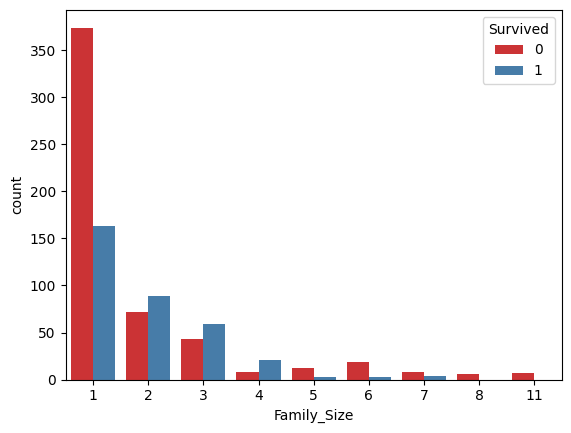

In [45]:
sns.countplot(data=train_df, x="Family_Size", hue="Survived", palette="Set1")

In [46]:
# (0,1], (1,4), (4, 6], (6, 20]

train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
train_df['Family_Cat'].value_counts()

,count
Family_Cat,
Solo,537
Small,292
Medium,37
Large,25


<Axes: xlabel='Family_Cat', ylabel='count'>

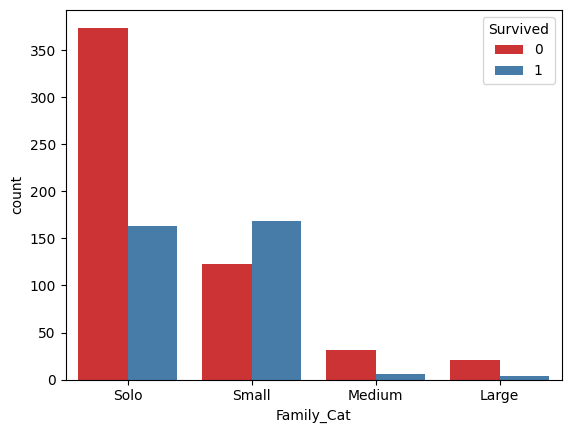

In [47]:
sns.countplot(data=train_df, x="Family_Cat", hue="Survived", palette="Set1")

In [48]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat'].value_counts()

,count
Family_Cat,
Solo,253
Small,145
Medium,10
Large,10


## Data wrangling

In [49]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [50]:
def display_missing(df, feature_cols):
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    missing_percent = 100 * df[col].isnull().sum() / len(df)

    if missing_count > 0:
      print(f"'{col}' has {missing_count} missing values, missing ({missing_percent:.2f}%)")

display_missing(train_df, feature_cols)

'Age' has 177 missing values, missing (19.87%)
'Embarked' has 2 missing values, missing (0.22%)


In [51]:
display_missing(test_df, feature_cols)

'Age' has 86 missing values, missing (20.57%)
'Fare' has 1 missing values, missing (0.24%)


### Filling missing values
**Age**
*   Filling missing values with median of whole dataset




In [52]:
age_by_sex_plcass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
age_by_sex_plcass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [53]:
# Filling the missing values in Age with the median of Sex and Pclass groups

# train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

train_df['Age'] = train_df['Age'].fillna(
    train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform('median')
)
train_df['Age'].isnull().sum()

np.int64(0)

In [54]:
test_df['Age'] = test_df['Age'].fillna(
    test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform('median')
)
test_df['Age'].isnull().sum()

np.int64(0)

In [55]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

'Embarked' has 2 missing values, missing (0.22%)
'Fare' has 1 missing values, missing (0.24%)


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_Size  891 non-null    int64   
 13  Family_Cat   891 non-null    category
dtypes: category(7), float64(2), int64(1), object(4)
memory usage: 63.2+ KB


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    category
 1   Name         418 non-null    object  
 2   Sex          418 non-null    category
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    category
 5   Parch        418 non-null    category
 6   Ticket       418 non-null    object  
 7   Fare         417 non-null    float64 
 8   Cabin        91 non-null     object  
 9   Embarked     418 non-null    category
 10  Title        418 non-null    object  
 11  Family_Size  418 non-null    int64   
 12  Family_Cat   418 non-null    category
dtypes: category(6), float64(2), int64(1), object(4)
memory usage: 29.9+ KB


In [58]:
x = train_df[feature_cols]
y = train_df['Survived']

x_test = test_df[feature_cols]

In [59]:
# preprocess pipeline

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [60]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

# (6) Model training

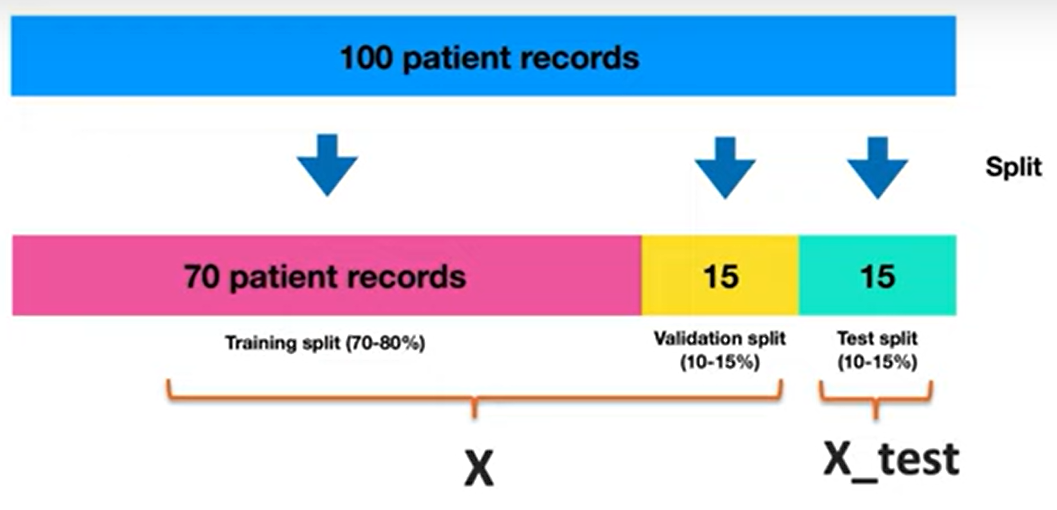

In [61]:
x = preprocessor.transform(x) # x -> x_train, x_val
x_test = preprocessor.transform(x_test)

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [63]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [64]:
x_test.shape

(418, 19)

In [65]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [66]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [67]:
log_reg.score(x_val, y_val)

0.8268156424581006

In [68]:
y_pred = log_reg.predict(x_val)

In [69]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7619047619047619, 0.75)

In [70]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       115
           1       0.76      0.75      0.76        64

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



*   y = ax1 + bx2 + bias -> y = ax1^2 + bx2^2 + c* x1*x2 + bias



In [71]:
poly = PolynomialFeatures(degree=5)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.fit_transform(x_val)

In [72]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [73]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8100558659217877

In [74]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2025)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2025)

In [75]:
decision_tree.score(x_val, y_val)

0.8268156424581006

## (6.1) Cross-validation

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2025)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring='accuracy', cv=5)
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [78]:
lr_scores.mean(), lr_scores.std()

(np.float64(0.826031008725127), np.float64(0.020466357172416235))

In [79]:
dt_scores = cross_val_score(dt_cv, x, y, scoring='accuracy', cv=5)
dt_scores

array([0.75418994, 0.81460674, 0.83146067, 0.79213483, 0.81460674])

In [80]:
dt_scores.mean(), dt_scores.std()

(np.float64(0.8013997865796247), np.float64(0.02670997154413754))

## (6.2) Baseline model comparison

In [81]:
!pip install xgboost

In [82]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2025
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state = seed)
]

In [83]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
  # define k-fold:
  kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, x, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])
  return cv_df

generate_baseline_results(models, x, y, 'accuracy', cv=5, plot_results=False)

,model_name,fold_idx,accuracy_score
0,LinearSVC,0,0.815642
1,LinearSVC,1,0.848315
2,LinearSVC,2,0.859551
3,LinearSVC,3,0.820225
4,LinearSVC,4,0.814607
5,SVC,0,0.815642
6,SVC,1,0.848315
7,SVC,2,0.865169
8,SVC,3,0.825843
9,SVC,4,0.808989


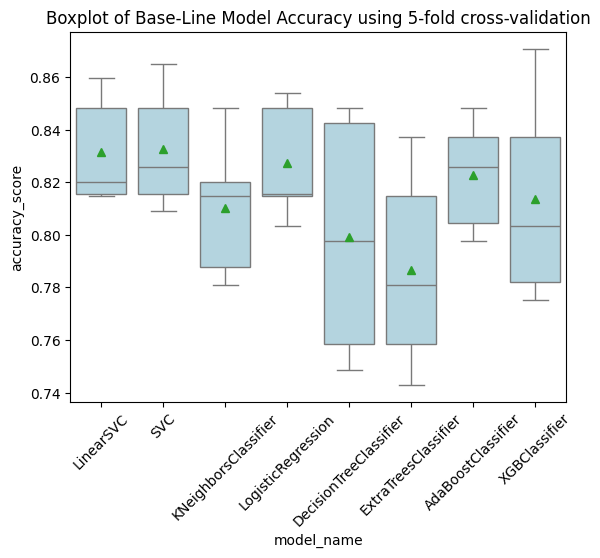

,model_name,fold_idx,accuracy_score
0,LinearSVC,0,0.815642
1,LinearSVC,1,0.848315
2,LinearSVC,2,0.859551
3,LinearSVC,3,0.820225
4,LinearSVC,4,0.814607
5,SVC,0,0.815642
6,SVC,1,0.848315
7,SVC,2,0.865169
8,SVC,3,0.825843
9,SVC,4,0.808989


In [84]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
  # define k-fold:
  kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, x, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])
  if plot_results:
    sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
    plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
    plt.xticks(rotation=45)
    plt.show()
  return cv_df

generate_baseline_results(models, x, y, 'accuracy', cv=5, plot_results=True)

In [85]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, x, y, metrics, cv=5, plot_results=False):
  # define k-fold:
  kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, x, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy_score'])
  if plot_results:
    sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
    plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
    plt.xticks(rotation=45)
    plt.show()

  # Summary result
  mean = cv_df.groupby('model_name').accuracy_score.mean()
  std = cv_df.groupby('model_name').accuracy_score.std()
  baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
  baseline_results.columns = ['Mean', 'Standard Deviation']

  # Sort by accuracy
  baseline_results.sort_values(by='Mean', ascending=False, inplace=True)

  return baseline_results

generate_baseline_results(models, x, y, 'accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.832791,0.023442
LinearSVC,0.831668,0.020817
LogisticRegression,0.827173,0.022475
AdaBoostClassifier,0.822692,0.021374
XGBClassifier,0.813728,0.039954
KNeighborsClassifier,0.810351,0.027097
DecisionTreeClassifier,0.799159,0.046176
ExtraTreesClassifier,0.786806,0.038917
